This notebook is to play around with exponential models.

In [123]:
! conda install statsmodels -y
! conda install scikit-learn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.2        

In [124]:
# Import modules
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("../outputs/mutational_model_stats.tsv", sep="\t")

In [10]:
sns.set_context("talk")

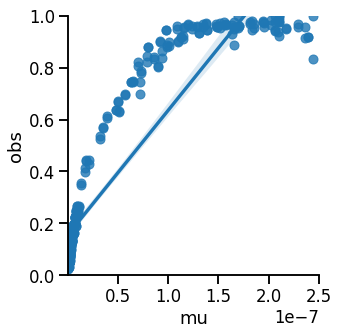

In [11]:
g = (sns.lmplot(data=df,
                x="mu",
                y="obs"
               )
    )
(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       ylim=(0,1),
      )
)

In [13]:
df["log_obs"] = np.log(df["obs"])

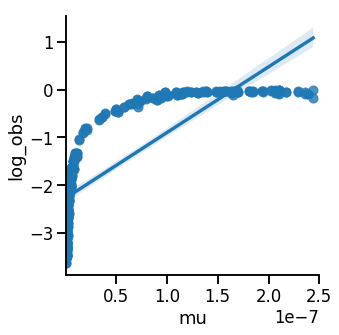

In [14]:
g = (sns.lmplot(data=df,
                x="mu",
                y="log_obs"
               )
    )
(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       #ylim=(0,1),
      )
)

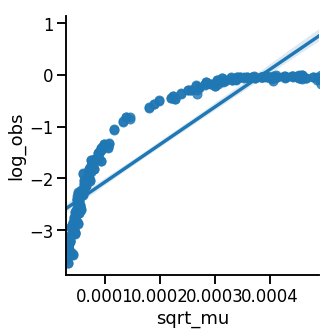

In [19]:
g = (sns.lmplot(data=df,
                x="sqrt_mu",
                y="log_obs"
               )
    )
(g.set(
    xlim=(3*10**-5, 4.9*10**-4),
       #ylim=(0,1),
      )
)

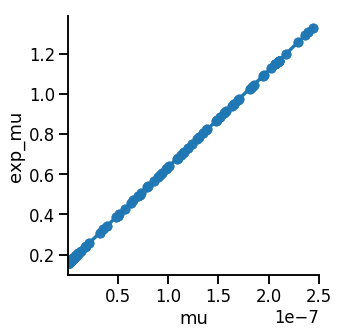

In [38]:
g = (sns.lmplot(data=df,
                x="mu",
                y="exp_mu"
               )
    )

(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       #ylim=(0,1),
      )
)

In [62]:
df = df[df["obs"] != 1]

In [147]:
def sem(x,n):
    p = x/n
    return np.sqrt(p*(1-p)/n)

R2 = 0.9934281046076844


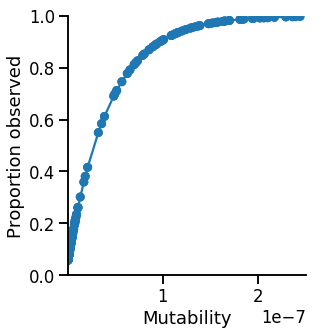

In [175]:
fit = np.polyfit(df["mu"], np.log(1 - df["obs"]), 1, w=(df["pos"]))
A,B = fit

df["fit_obs"] = 1 - (np.exp(B)) * (np.exp(A * df["mu"]))

# Why is this different?
df["fit_obs_a"] = - p(df["mu"])

print(f'R2 = {r2_score(df["obs"], df["fit_obs"])}')

g = (sns.relplot(kind="scatter",
                 data=df,
                 x="mu",
                 y="fit_obs",
                 edgecolor="none",
               )
    )

(g.set(xlim=(8.9*10**-10, 2.5*10**-7),
       ylim=(0,1),
       xlabel="Mutability",
       ylabel="Proportion observed",
      )
)

plt.plot(sorted(df["mu"]), sorted(df["fit_obs"]))

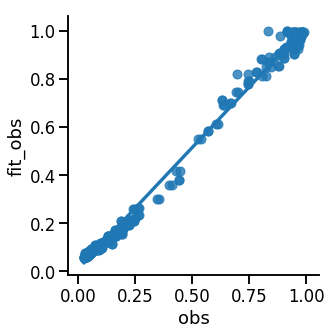

In [155]:
g = sns.lmplot(data=df, x="obs", y="fit_obs")